#**Lab1**

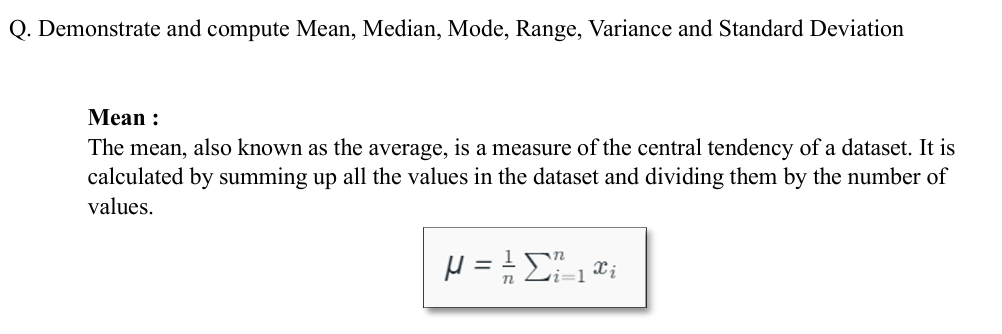

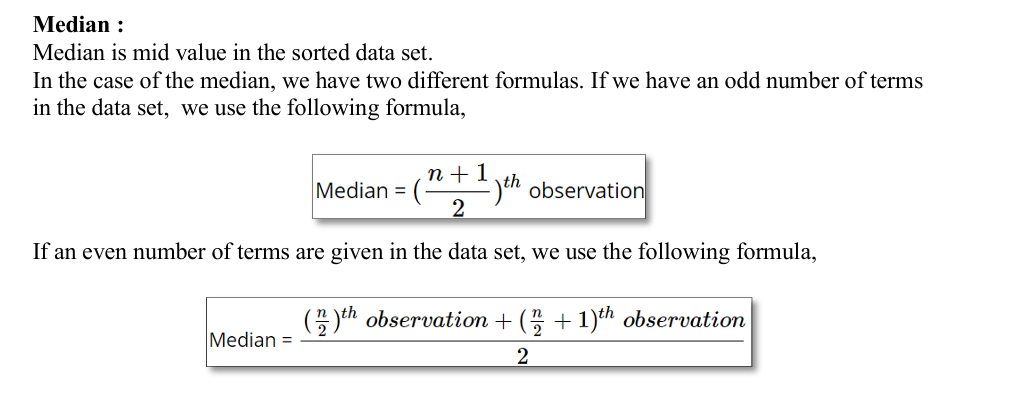

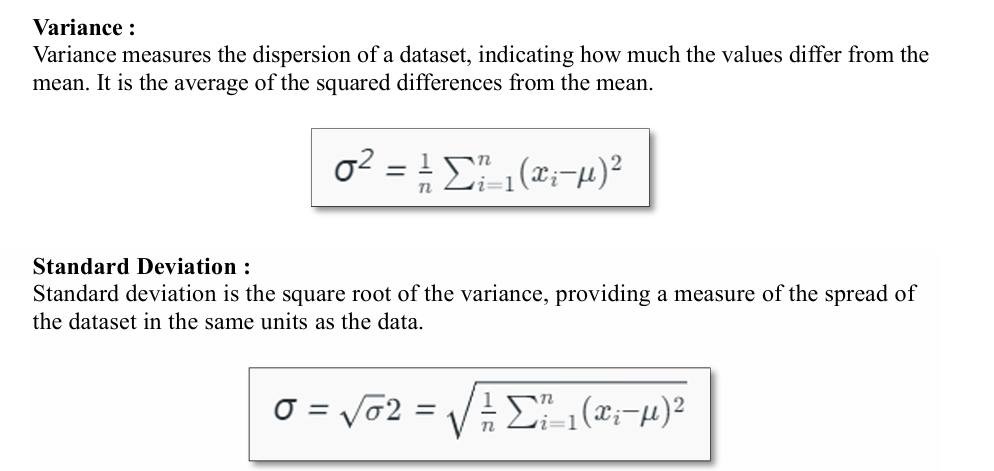

In [ ]:
import numpy as np
from scipy import stats

data = [2, 4, 4, 5, 7, 9, 11, 11, 13, 14, 41]
data_array = np.array(data)

# MEAN
mean = np.mean(data_array)

# MEDIAN
median = np.median(data_array)

# MODE
mode_result = stats.mode(data_array, keepdims=True)
mode = mode_result.mode[0]
mode_count = mode_result.count[0]

# RANGE
range_value = np.ptp(data_array)

# VARIANCE
variance = np.var(data_array, ddof=1)

# STANDARD DEVIATION
std = np.std(data_array, ddof=1)

# Print results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode, "(Count:", mode_count, ")")
print("Range:", range_value)
print("Variance:", variance)
print("Standard Deviation:", std)


Mean: 11.0
Median: 9.0
Mode: 4 (Count: 2 )
Range: 39
Variance: 114.8
Standard Deviation: 10.714476188783099


#**Lab4**


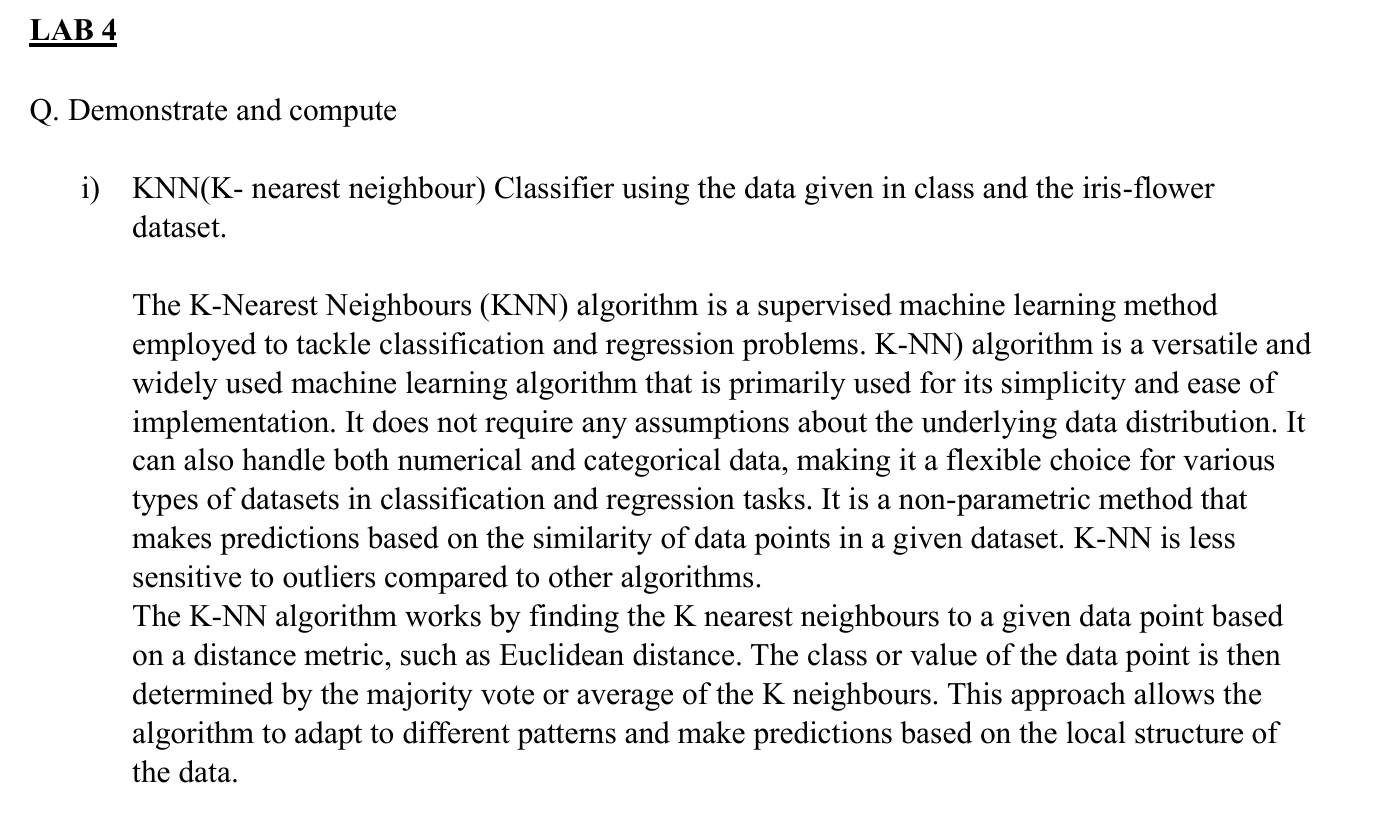

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('/content/iris_data.csv')

# Features and labels
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN model with k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Model prediction
y_pred = knn.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Predict a new data point
new_point = [[5.2, 3.1]]
new_point_scaled = scaler.transform(new_point)  # Scale the new data point
predicted_label = knn.predict(new_point_scaled)
print(f"Predicted label for {new_point}: {predicted_label[0]}")


Model Accuracy: 1.00
Predicted label for [[5.2, 3.1]]: Setosa


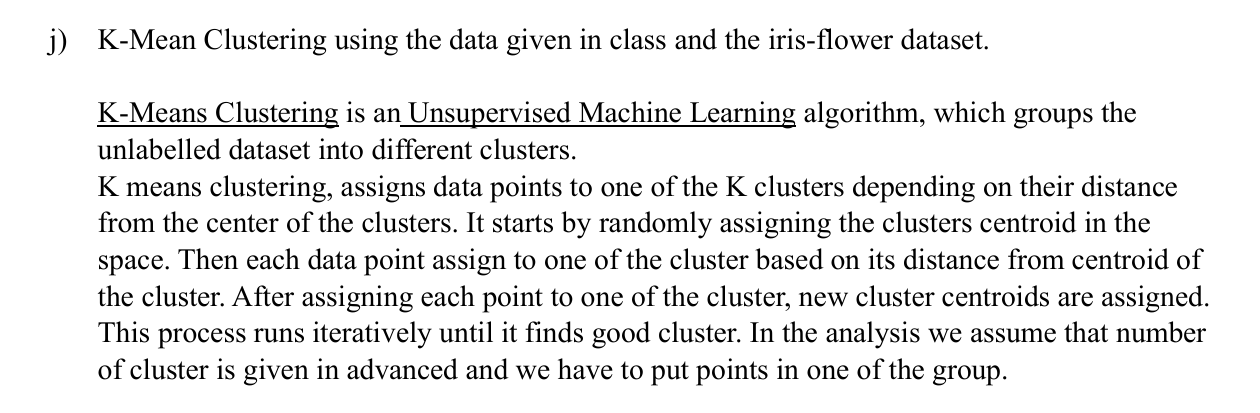

Cluster Centers:
 [[183.5   72.25]
 [169.    58.  ]]

Updated Clusters:
    Feature1  Feature2  Cluster
0       185        72        0
1       170        56        1
2       168        60        1
3       179        68        0
4       182        72        0
5       188        77        0


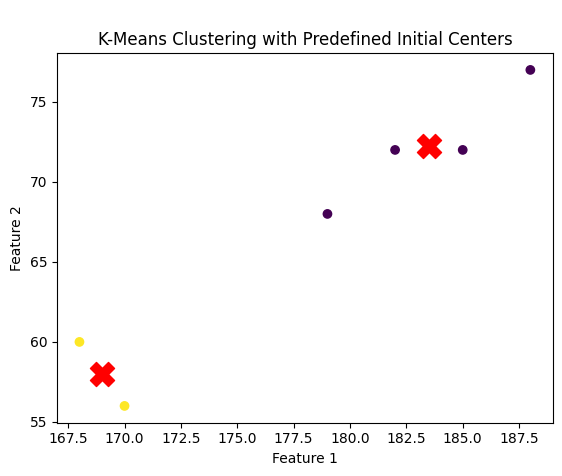

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('/content/class_data.csv')

initial_centers = np.array([[185, 72], [170, 56]])

k = len(initial_centers)
kmeans = KMeans(n_clusters=k, init=initial_centers, n_init=1,
random_state=42)

X = df[['Feature1', 'Feature2']].values

kmeans.fit(X)

labels = kmeans.predict(X)

df['Cluster'] = labels

print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nUpdated Clusters:\n", df[['Feature1', 'Feature2',
'Cluster']])

plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'],
cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0],
kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('\nK-Means Clustering with Predefined Initial Centers')
plt.show()

#**Lab5**

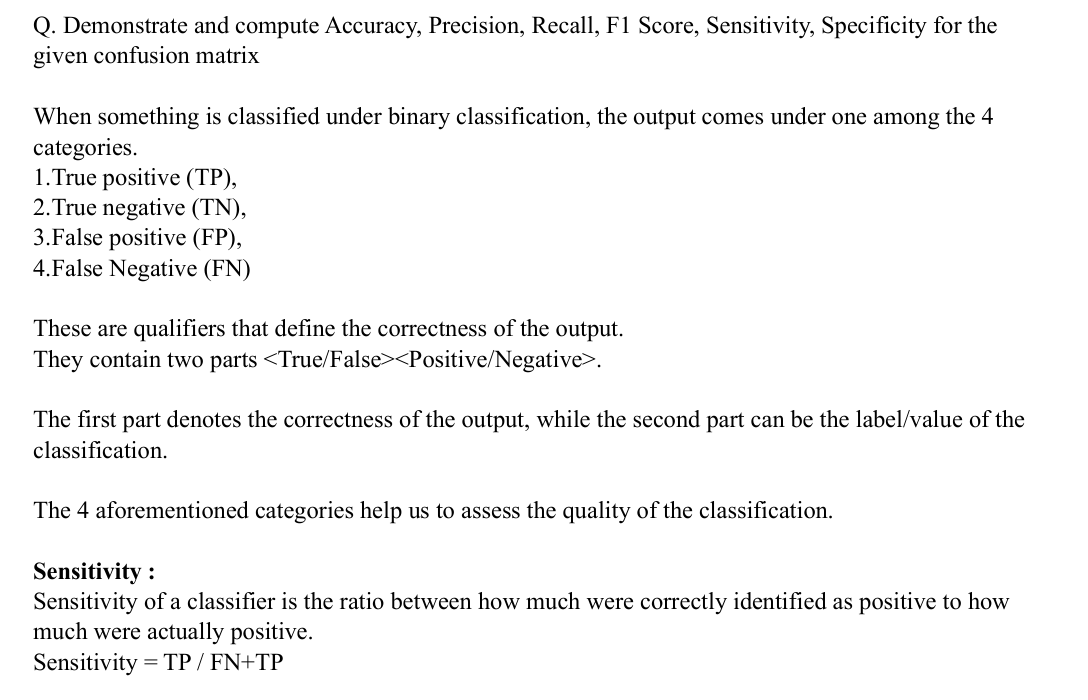

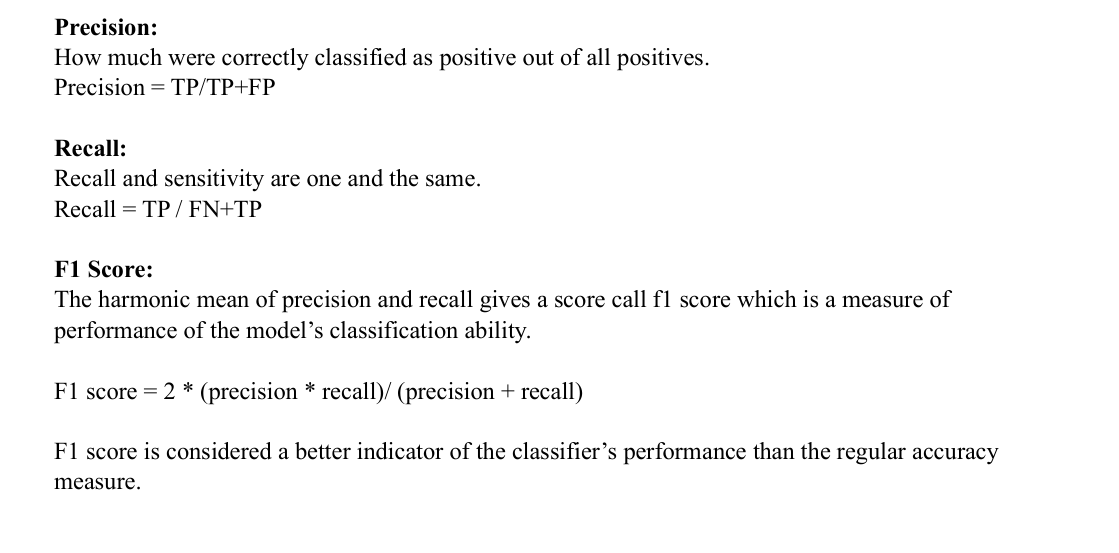

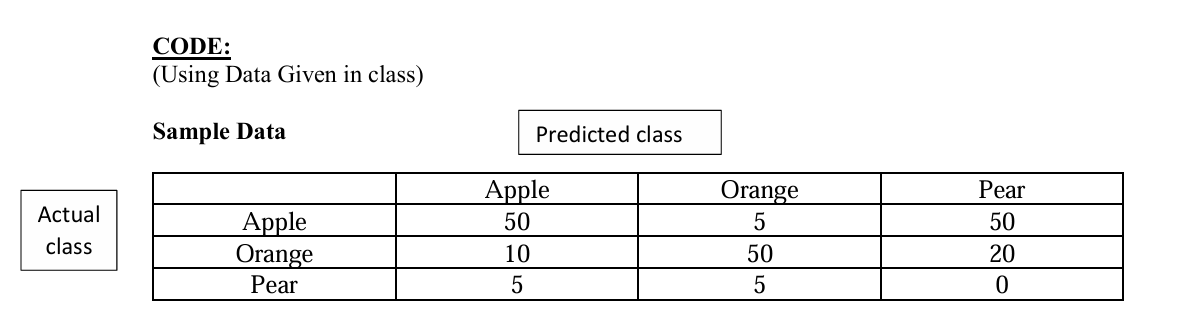

In [10]:
import numpy as np

# Define the confusion matrix
confusion_matrix = np.array([
    [50, 5, 50],
    [10, 50, 20],
    [5, 5, 0]
])

# Number of classes and total samples
num_classes = confusion_matrix.shape[0]
total = confusion_matrix.sum()

# Loop through each class to compute metrics
for i in range(num_classes):
    TP = confusion_matrix[i, i]
    FN = confusion_matrix[i, :].sum() - TP
    FP = confusion_matrix[:, i].sum() - TP
    TN = total - (TP + FP + FN)

    # Metrics calculations
    accuracy = (TP + TN) / total
    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0
    specificity = TN / (TN + FP) if (TN + FP) else 0

    # Print metrics for each class
    print(f"\nClass {i} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print(f"Specificity: {specificity:.2f}")



Class 0 Metrics:
Accuracy: 0.64
Precision: 0.77
Recall: 0.48
F1 Score: 0.59
Specificity: 0.83

Class 1 Metrics:
Accuracy: 0.79
Precision: 0.83
Recall: 0.62
F1 Score: 0.71
Specificity: 0.91

Class 2 Metrics:
Accuracy: 0.59
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Specificity: 0.62


#**Lab7**

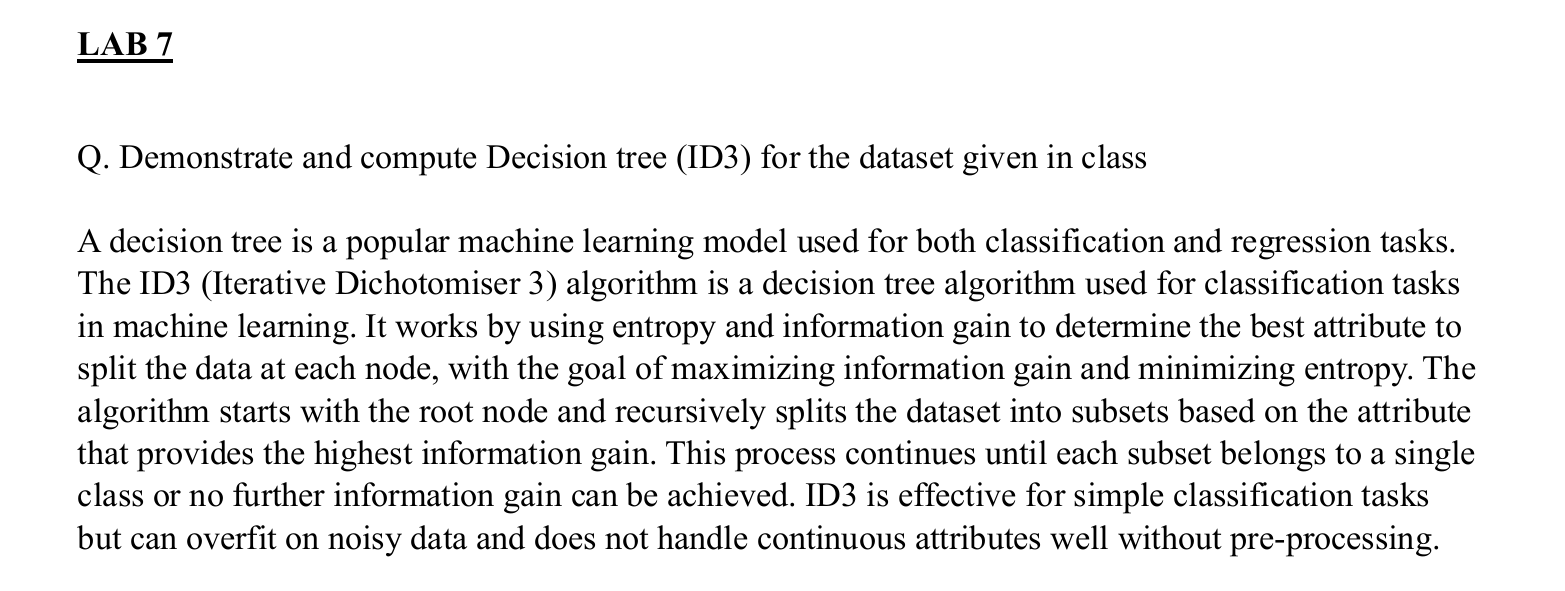

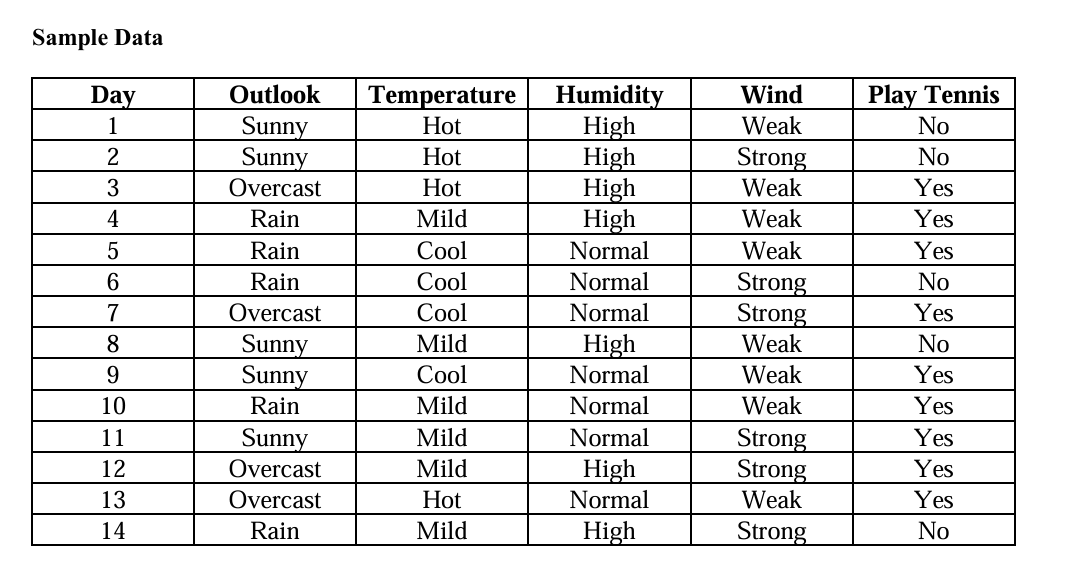

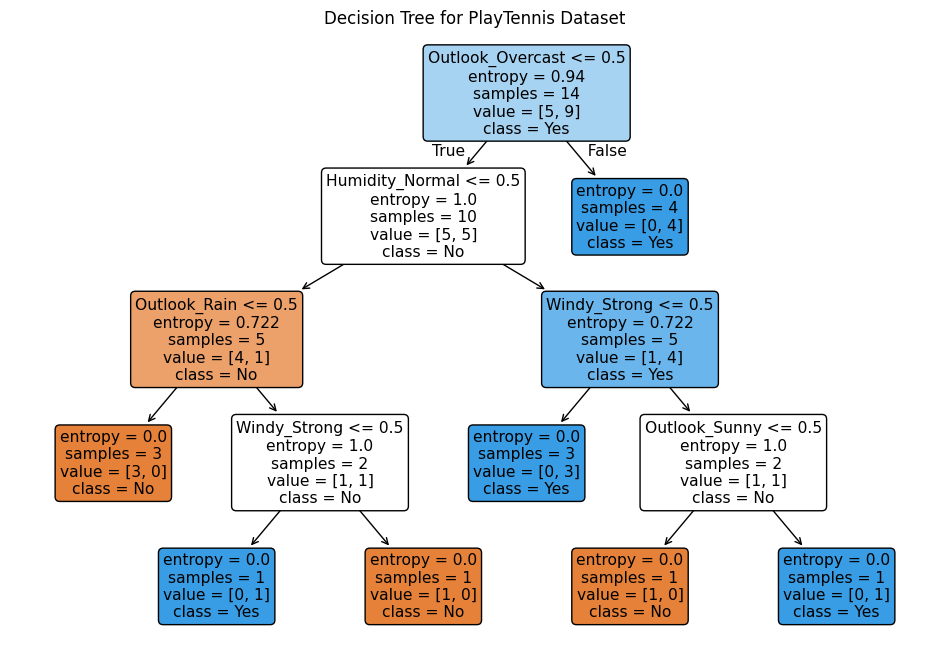

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical features into dummy/one-hot encoded variables
X = pd.get_dummies(df.drop('PlayTennis', axis=1))
y = df['PlayTennis']

# Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.title("Decision Tree for PlayTennis Dataset")
plt.show()


#**Lab8**

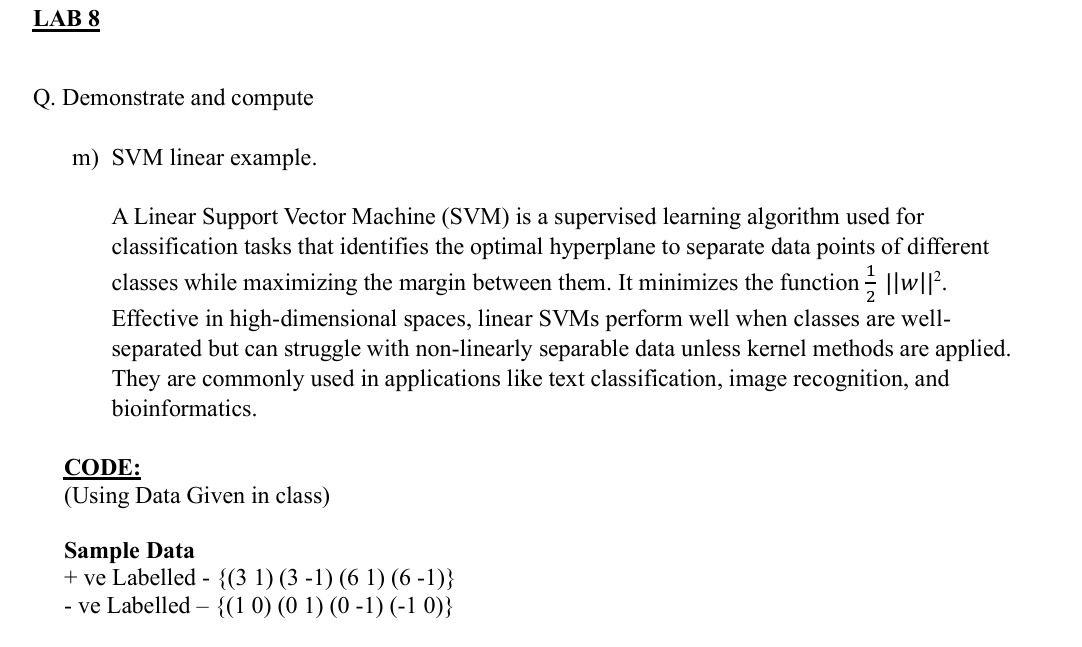

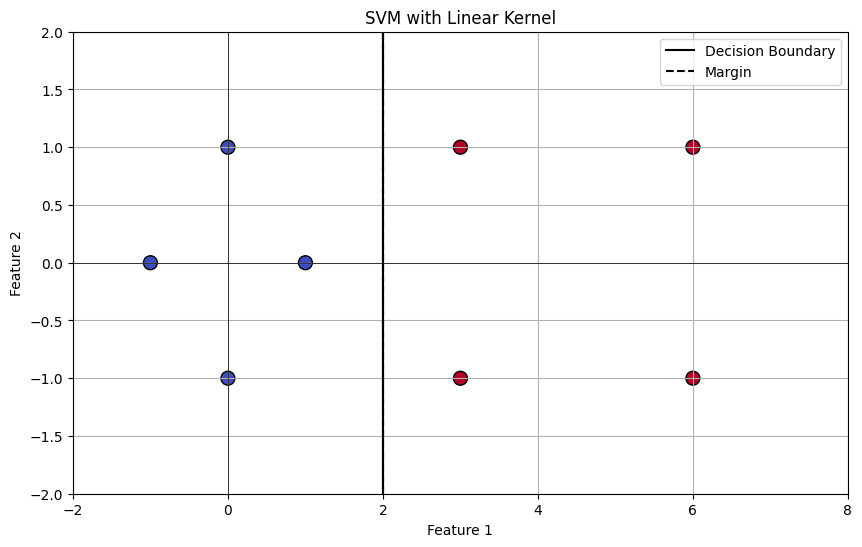

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define dataset
X = np.array([[3, 1], [3, -1], [6, 1], [6, -1], [1, 0], [0, 1], [0, -1], [-1, 0]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)

# Extract weights and intercept to plot the decision boundary
w = svm_linear.coef_[0]
b = svm_linear.intercept_[0]

# Decision boundary
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
yy = - (w[0] * xx + b) / w[1]
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Margins
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_margin_pos = yy + margin
yy_margin_neg = yy - margin
plt.plot(xx, yy_margin_pos, 'k--', label='Margin')
plt.plot(xx, yy_margin_neg, 'k--')

# Plot settings
plt.title('SVM with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-2, 8)
plt.ylim(-2, 2)
plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.show()


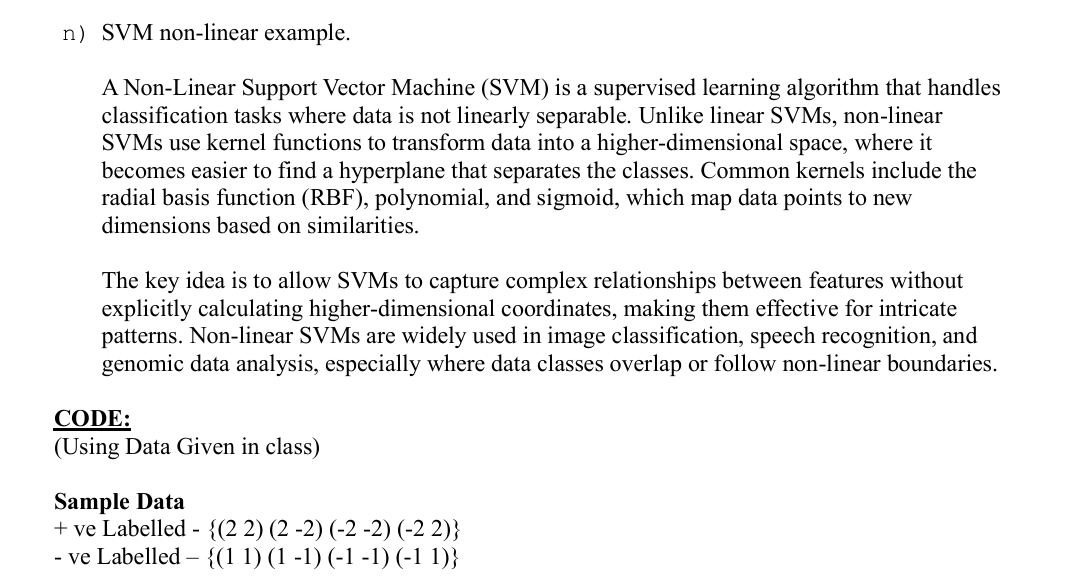

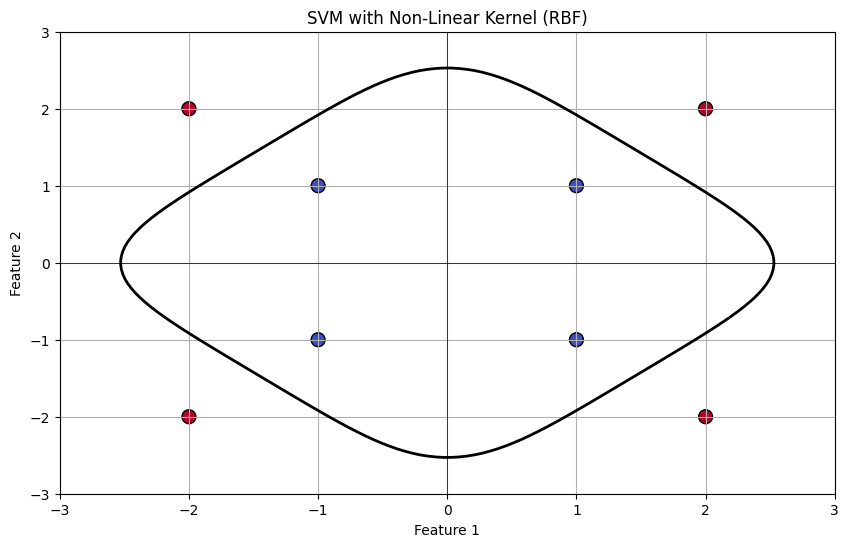

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define the data points and their labels
X = np.array([[2, 2], [2, -2], [-2, -2], [-2, 2], [1, 1], [1, -1],
              [-1, -1], [-1, 1]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])  # Positive labels are +1 and negative labels are -1

# Create and fit the SVM model with an RBF kernel
svm_non_linear = SVC(kernel='rbf', gamma='auto')  # gamma='auto' to avoid warnings for small datasets
svm_non_linear.fit(X, y)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)

# Create a grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Calculate the decision function on the grid
Z = svm_non_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

# Additional aesthetics
plt.title('SVM with Non-Linear Kernel (RBF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

plt.show()


#**Lab9**

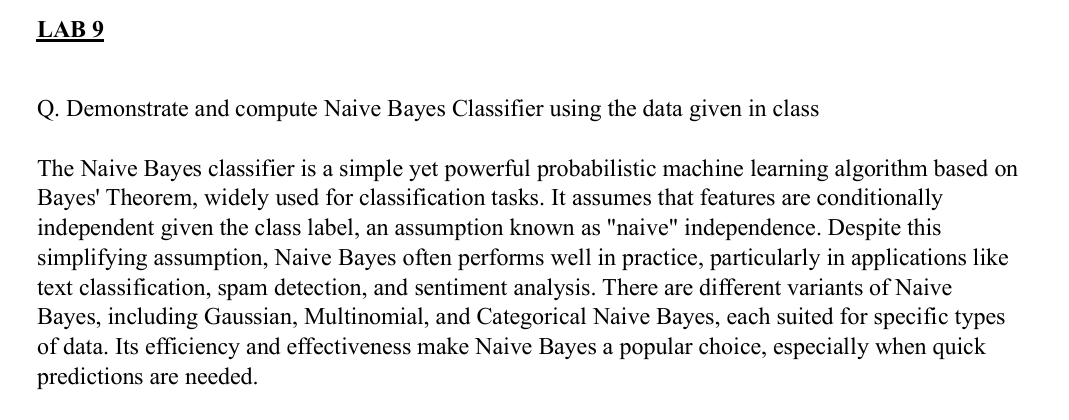

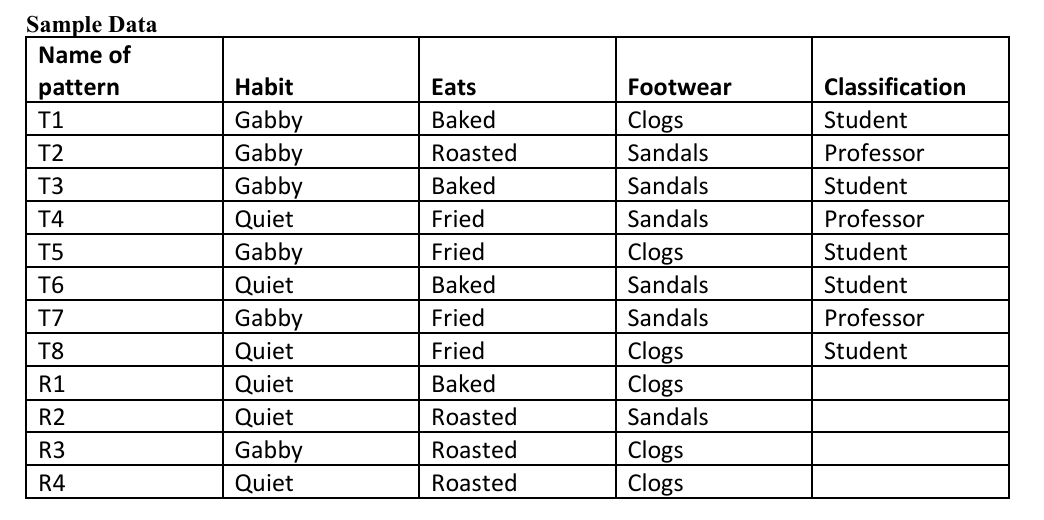

In [21]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with categorical features and a target classification column
data = pd.DataFrame({
    'Pattern': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'R1', 'R2', 'R3', 'R4'],
    'Habit': ['Gabby', 'Gabby', 'Gabby', 'Quiet', 'Gabby', 'Quiet', 'Gabby', 'Quiet', 'Quiet', 'Quiet', 'Gabby', 'Quiet'],
    'Eats': ['Baked', 'Roasted', 'Baked', 'Fried', 'Fried', 'Baked', 'Fried', 'Fried', 'Baked', 'Roasted', 'Roasted', 'Roasted'],
    'Footwear': ['Clogs', 'Sandals', 'Sandals', 'Sandals', 'Clogs', 'Sandals', 'Sandals', 'Clogs', 'Clogs', 'Sandals', 'Clogs', 'Clogs'],
    'Classification': ['Student', 'Professor', 'Student', 'Professor', 'Student', 'Student', 'Professor', 'Student', None, None, None, None]
})

# Separate labeled and unlabeled data
labeled_data = data[data['Classification'].notna()]
unlabeled_data = data[data['Classification'].isna()]

# Label Encoding for categorical data
label_encoders = {}
for column in data.columns:
    if column != 'Classification':  # Skip the target column
        le = LabelEncoder()
        # Fit on the combined unique values from both DataFrames
        all_values = pd.concat([labeled_data[column], unlabeled_data[column]]).astype(str).unique()
        le.fit(all_values)
        labeled_data[column] = le.transform(labeled_data[column].astype(str))
        unlabeled_data[column] = le.transform(unlabeled_data[column].astype(str))
        label_encoders[column] = le  # Store the encoder for each column
    else: # Create a LabelEncoder for the 'Classification' column
        le = LabelEncoder()
        le.fit(labeled_data[column]) # Fit only on labeled data to avoid NaN issues
        labeled_data[column] = le.transform(labeled_data[column]) # Transform labeled data
        label_encoders[column] = le #Store the encoder

# Prepare features (X) and target (y) for the Naive Bayes classifier
X = labeled_data[['Pattern', 'Habit', 'Eats', 'Footwear']]
y = labeled_data['Classification']

# Initialize and train the Naive Bayes classifier
nb_classifier = CategoricalNB()
nb_classifier.fit(X, y)

# Predict classifications for unlabeled data
X_unlabeled = unlabeled_data[['Pattern', 'Habit', 'Eats', 'Footwear']]
y_pred_unlabeled = nb_classifier.predict(X_unlabeled)

# Decode predictions back to original categorical labels
decoded_predictions = label_encoders['Classification'].inverse_transform(y_pred_unlabeled) # Now using the correct LabelEncoder

# Output predicted classifications for the unlabeled data
print("\nPredicted classifications for unlabeled data:")
for i, pred in enumerate(decoded_predictions, 1):
    print(f"R{i}: {pred}")


Predicted classifications for unlabeled data:
R1: Student
R2: Professor
R3: Student
R4: Student


#**Lab10**

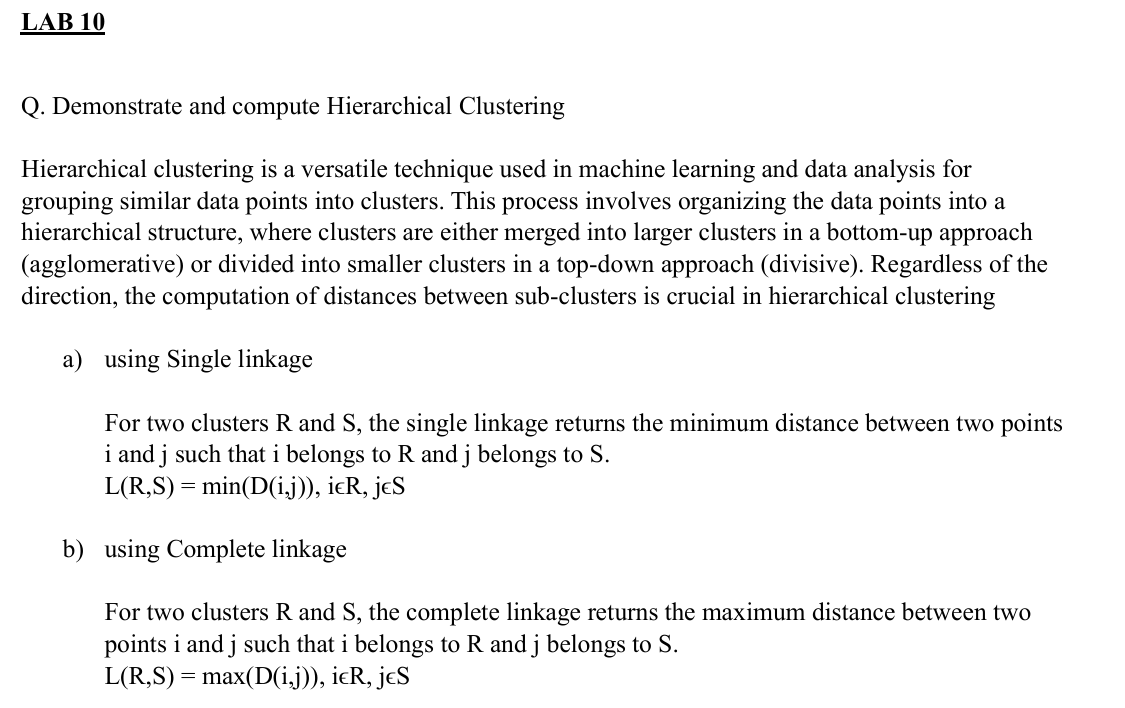

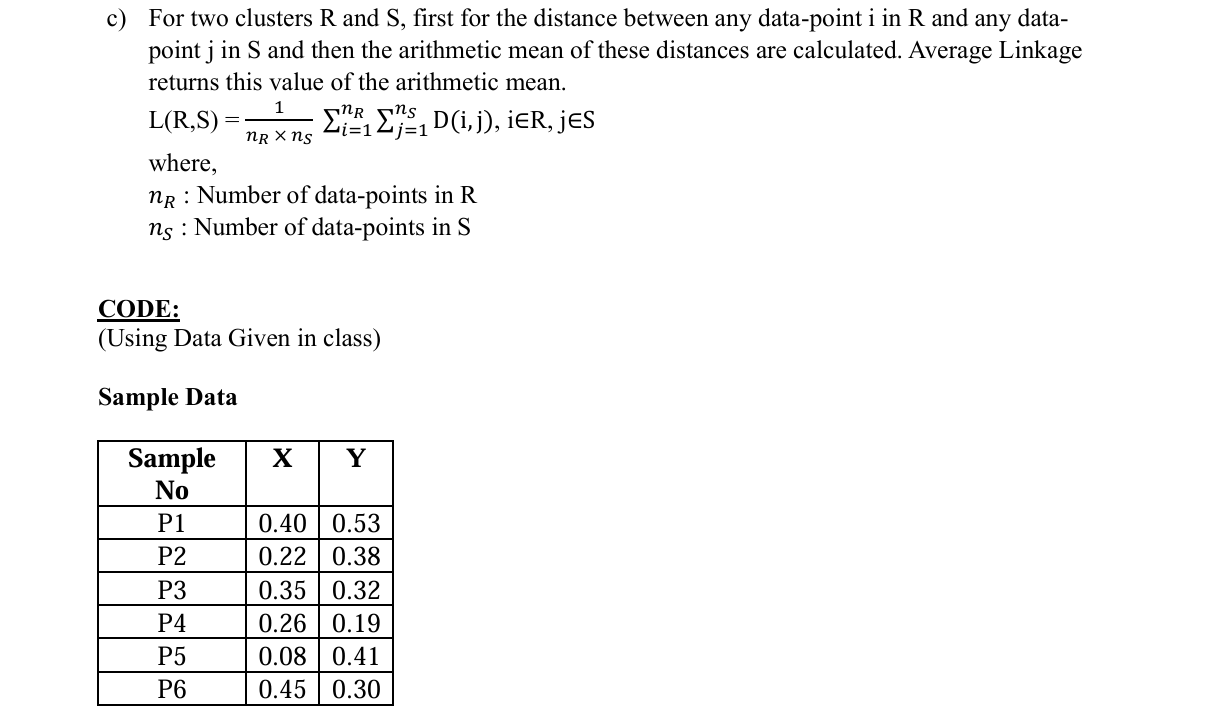

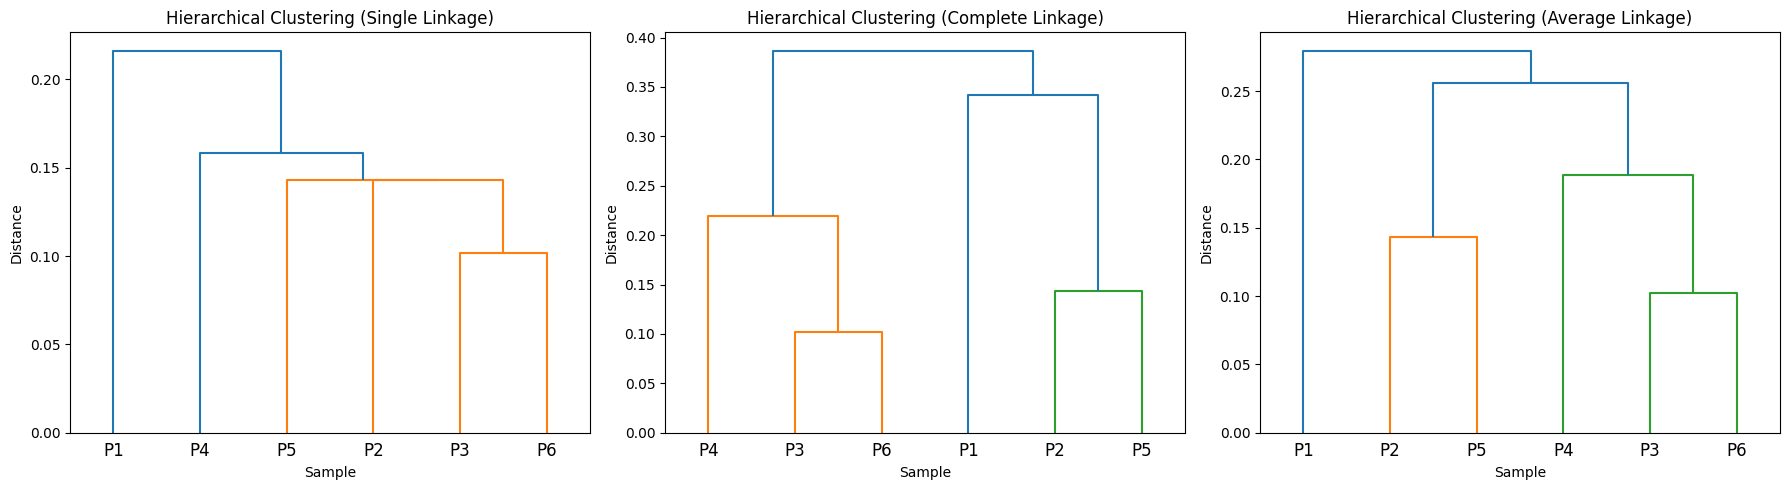

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

# Data
data = {
    'Sample No': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6'],
    'X': [0.4, 0.22, 0.35, 0.26, 0.08, 0.45],
    'Y': [0.53, 0.38, 0.32, 0.19, 0.41, 0.3]
}
df = pd.DataFrame(data)

# Selecting features for clustering
X = df[['X', 'Y']].values

# List of linkage methods to try
linkage_methods = ['single', 'complete', 'average']

# Create subplots for the dendrograms
plt.figure(figsize=(18, 5))

# Loop through linkage methods and plot dendrograms
for i, method in enumerate(linkage_methods, 1):
    Z = linkage(X, method=method)  # Compute the linkage matrix
    plt.subplot(1, 3, i)  # Create a subplot for each method
    dendrogram(Z, labels=df['Sample No'].values)  # Plot the dendrogram
    plt.title(f"Hierarchical Clustering ({method.capitalize()} Linkage)")  # Correct title string
    plt.xlabel("Sample")
    plt.ylabel("Distance")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


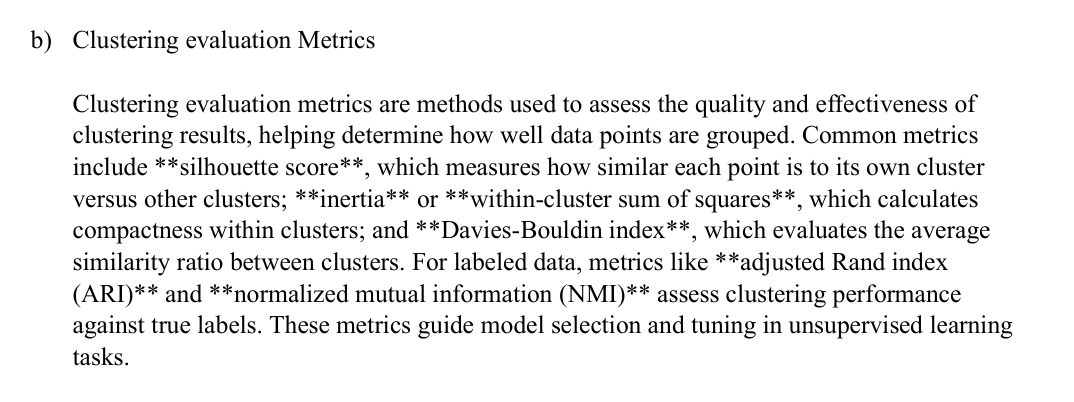

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Define the dataset
data = {
    'Sample No': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6'],
    'X': [0.4, 0.22, 0.35, 0.26, 0.08, 0.45],
    'Y': [0.53, 0.38, 0.32, 0.19, 0.41, 0.3]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)
X = df[['X', 'Y']].values  # Use only the X and Y columns

# Manually create a ground truth (you can replace this with real labels if available)
df['True_Cluster'] = [0, 0, 1, 1, 0, 1]  # Example of arbitrary true labels (cluster 0 and 1)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust the number of clusters
df['Cluster'] = kmeans.fit_predict(X)

# Calculate Silhouette Score and Adjusted Rand Index
silhouette_avg = silhouette_score(X, df['Cluster'])
rand_index = adjusted_rand_score(df['True_Cluster'], df['Cluster'])

# Print results
print("Clustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Adjusted Rand Index: {rand_index:.2f}")


Clustering Evaluation Metrics:
Silhouette Score: 0.17
Adjusted Rand Index: 0.00


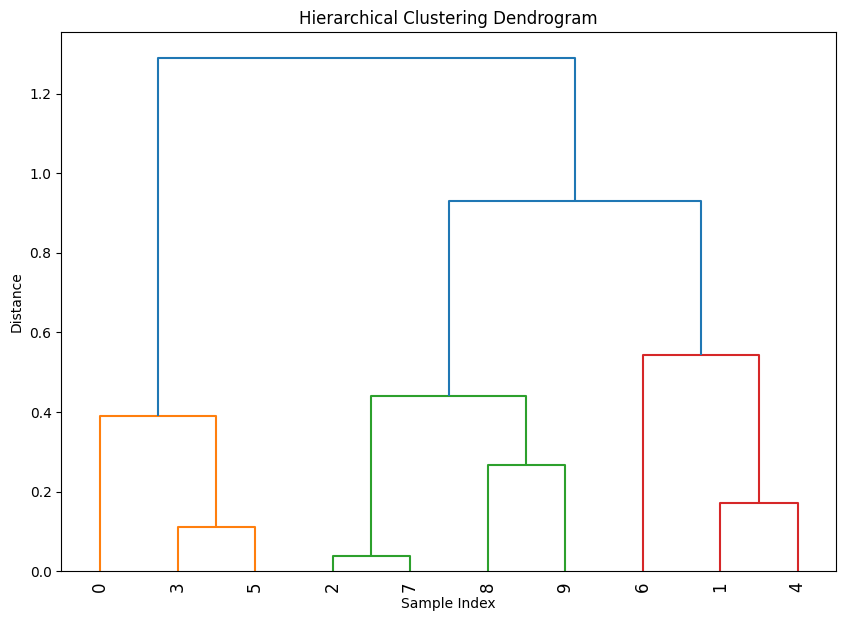

Cluster labels for each sample: [1 1 1 1 1 1 1 1 1 1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generate sample data
np.random.seed(42)
data = np.random.rand(10, 2)  # 10 samples, 2 features

# Perform hierarchical clustering
Z = linkage(data, method='ward')  # You can change 'ward' to 'single', 'complete', etc.

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Form flat clusters
max_d = 1.5  # This distance will define the flat clusters
clusters = fcluster(Z, max_d, criterion='distance')

print("Cluster labels for each sample:", clusters)


In [ ]:




from sklearn.cluster import AgglomerativeClustering
import numpy as np

# randomly chosen dataset
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
clustering = AgglomerativeClustering(n_clusters=2).fit(X)

# print the class labels
print(clustering.labels_)

[1 1 1 0 0 0]


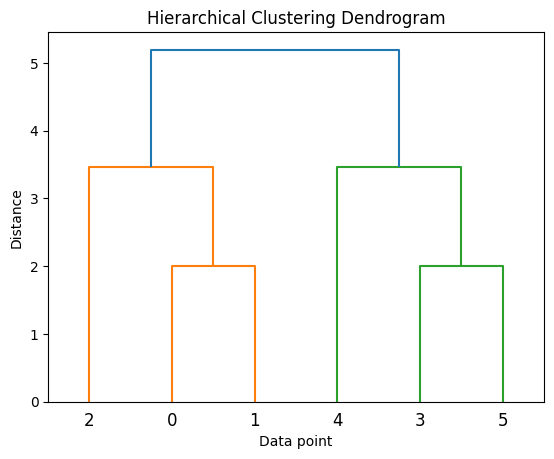

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# randomly chosen dataset
X = np.array([[1, 2], [1, 4], [1, 0],
			[4, 2], [4, 4], [4, 0]])

# Perform hierarchical clustering
Z = linkage(X, 'ward')

# Plot dendrogram
dendrogram(Z)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()